In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df1 = pd.read_csv('Data/preprocessing_data.csv')

In [3]:
df1_oxid = df1[['Reinforcement','Oxid_time']]

<Axes: xlabel='Reinforcement', ylabel='Oxid_time'>

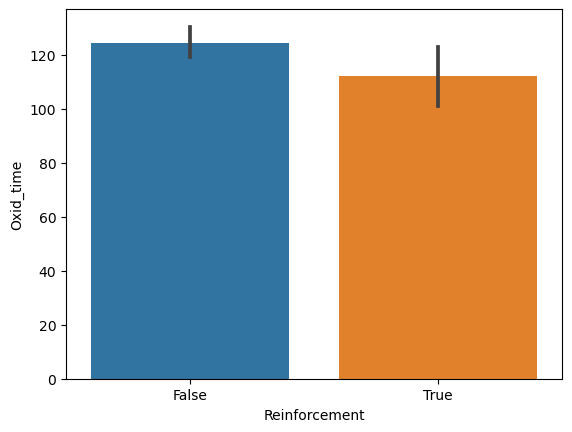

In [4]:
sns.barplot(data = df1_oxid, x = 'Reinforcement', y = 'Oxid_time')

In [5]:
# 귀무가설 : 보강 여부에 따라 공정시간의 평균의 차이가 없다.
# 대립가설 : 보강 여부에 따라 공정시간의 평균의 차이가 있다.
import scipy.stats as stats

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Oxid_time', ylabel='Count'>

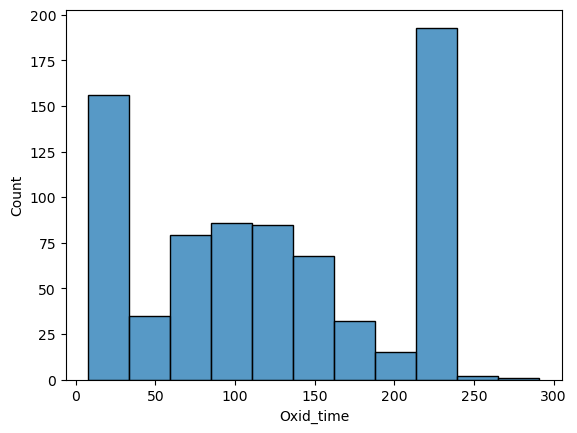

In [6]:
# 보강 여부 : 범주형 데이터 / Y : 연속형
# 1-1. Oxid_time 데이터가 정규분포를 띄는가?
sns.histplot(data = df1, x='Oxid_time')
# 귀무가설 Oxid_time 데이터 정규분포와 같다.
# 대립가설 Oxid_time 데이터 정규분포와 다르다.

In [7]:
stats.normaltest(df1['Oxid_time'])

NormaltestResult(statistic=7323.6988862575145, pvalue=0.0)

In [8]:
# P.value < 5% (0.05)
# 통계적 결론 : 대립가설 참
# 사실적 결론 : 해당 데이터의 분포는 정규분포를 띄지 않는다.

In [9]:
# 1-2. 보강 여부에 따라 공정시간의 차이가 있는지 검정 (비정규, 2집단 wilcoxon-> ranksum)
cond1 = (df1['Reinforcement'] == True)
df1_rein = df1.loc[cond1]

cond2 = (df1['Reinforcement'] == False)
df1_nonrein = df1.loc[cond2]

In [10]:
stats.ranksums(df1_rein['Oxid_time'],df1_nonrein['Oxid_time'] )

RanksumsResult(statistic=-0.972244747533458, pvalue=0.3309288040213433)

In [11]:
# p.value > 0.05
# 통계적 결론 : 귀무 가설 참
# 사실적 결론 : 보강 여부에 따라 공정시간의 평균의 차이가 없다.

---

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats

In [4]:
df1 = pd.read_csv('Data/preprocessing_data.csv')

In [5]:
df1_uv = df1[['UV_type','Range_check']] # 범주형 vs 범주형
df1_contingency = pd.crosstab(df1_uv['UV_type'],df1_uv['Range_check'])

In [6]:
df1_contingency

Range_check,False,True
UV_type,,
G,36,234
H,86,170
I,40,186


In [7]:
# 귀무가설 : 레이저 종류(UV Type)에 따라 선폭의 적정여부(T/F)의 유의미한 차이가 없다.
# 대립가설 : 레이저 종류(UV Type)에 따라 선폭의 적정여부(T/F)의 유의미한 차이가 있다.
#           (두 범주형 변수가 서로 연관성이 있다.)
stats.chi2_contingency(df1_contingency)

Chi2ContingencyResult(statistic=34.738055467596986, pvalue=2.862378750713432e-08, dof=2, expected_freq=array([[ 58.16489362, 211.83510638],
       [ 55.14893617, 200.85106383],
       [ 48.68617021, 177.31382979]]))

In [8]:
# P.value < 0.05
# 통계적 결론 : 대립가설 참
# 사실적 결론 : 레이저 종류(UV Type)에 따라 선폭의 적정여부(T/F)의 유의미한 차이가 있다.
#           (두 범주형 변수가 서로 연관성이 있다.)

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

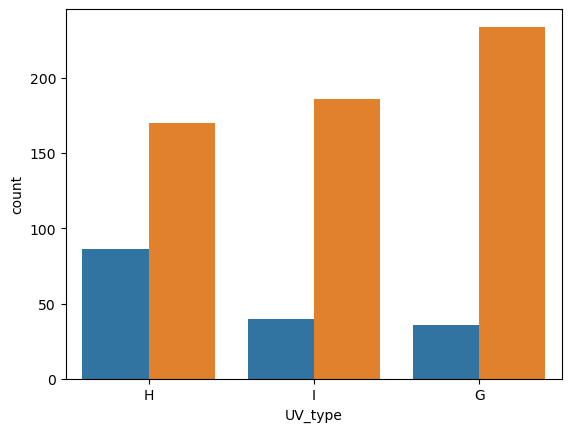

In [9]:
sns.countplot(data = df1, x='UV_type', hue = 'Range_check')

---

In [38]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats

In [39]:
df1 = pd.read_csv('Data/chamber_route.csv')

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     45 non-null     int64  
 1   Chamber_Route  45 non-null     object 
 2   Target         45 non-null     int64  
 3   count          45 non-null     int64  
 4   error_rate     45 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ KB


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

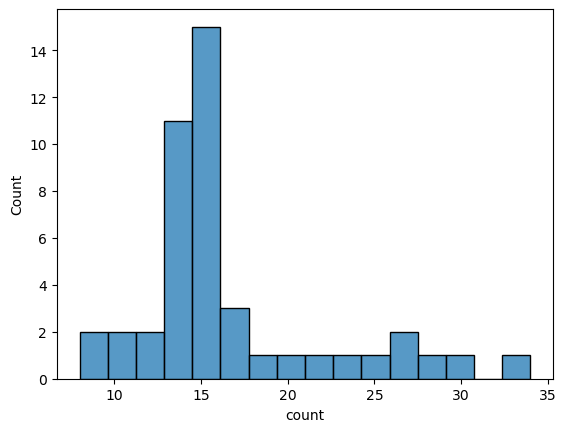

In [41]:
sns.histplot(data = df1, x= 'count')

In [42]:
# 공정 경로에 따라 부하량과 부량 개수의 유의미한 차이가 있는가?
df1['count'].describe()

count    45.000000
mean     16.711111
std       5.459030
min       8.000000
25%      14.000000
50%      15.000000
75%      17.000000
max      34.000000
Name: count, dtype: float64

In [43]:
df1['count'].quantile(0.90)

25.6

In [44]:
cond1 = (df1['count'] > 25)
df1.loc[cond1, '과부하여부'] = '과부하'
df1.loc[~cond1, '과부하여부'] = '정상'

In [45]:
# 과부하 여부 (범주형) VS 불량Die의 개수 (연속)
# 1-1. Target 값의 정규성 검정
df1

,Unnamed: 0,Chamber_Route,Target,count,error_rate,과부하여부
0,0,route_11111,1415,15,94.333333,정상
1,1,route_11133,1367,13,105.153846,정상
2,2,route_11222,2281,25,91.240000,정상
3,3,route_11311,1811,17,106.529412,정상
4,4,route_11333,1203,14,85.928571,정상
5,5,route_12111,1677,18,93.166667,정상
6,6,route_12133,1519,14,108.500000,정상
7,7,route_12222,2835,20,141.750000,정상
8,8,route_12311,1253,15,83.533333,정상
9,9,route_12333,2152,16,134.500000,정상


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Target', ylabel='Count'>

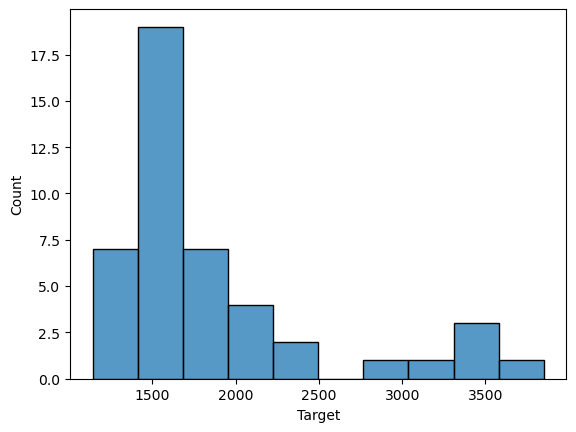

In [46]:
sns.histplot(data = df1, x = 'Target')

In [47]:
# 귀무 가설 : Target값은 정규분포를 따른다.
# 대립 가설 : Target값은 정규분포를 따르지 않는다.
stats.normaltest(df1['Target'])

NormaltestResult(statistic=19.830161075462293, pvalue=4.942369772655265e-05)

In [48]:
# P.value < 0.05
# 통계적 결론 : 대립가설이 참
# 사실적 결론 : Target값은 정규분포를 따르지 않는다.

In [49]:
# 1-2. (비정규분포) 경로 부하 여부에 따른 불량의 차이가 있는가
# 귀무가설 : 부하여부에 따라 불량 개수 평균의 차이가 없다.
# 대립가설 : 부하여부에 따라 불량 개수의 평균의 차이가 있다.
cond1 = (df1['과부하여부'] == '과부하')
df1_overload = df1.loc[cond1]
df1_normal = df1.loc[~cond1]

In [50]:
stats.ranksums(df1_overload['Target'],df1_normal['Target'])

RanksumsResult(statistic=3.611575592573076, pvalue=0.00030434234335938035)

In [51]:
# P.value < 0.05
# 통계적 결론 : 대립가설 참
# 사실적 결론 : 부하여부에 따라 불량 개수의 평균의 차이가 있다.

In [52]:
df1.pivot_table(index = '과부하여부', values = 'Target', aggfunc = 'mean')

,Target
과부하여부,
과부하,3438.400
정상,1677.125


In [53]:
# 1-3. (만약, Target값이 정규분포를 띄었을 때) 등분산 검정
# 귀무가설 : 부하여부에 따른 불량개수의 분산이 같다.
# 대립가설 : 부하여부에 따른 불량개수의 분산이 다르다.

stats.levene(df1_overload['Target'], df1_normal['Target'])

LeveneResult(statistic=0.3912575056896691, pvalue=0.5349450584636936)

In [54]:
# P.value > 0.05
# 통계적 결론 : 귀무가설이 참.
# 사실적 결론 : 부하여부에 따른 불량개수의 분산이 같다.

In [55]:
# 1-4 (등분산을 가정한) 두 집단간 평균 비교
stats.ttest_ind(df1_overload['Target'], df1_normal['Target'], equal_var = True)

TtestResult(statistic=10.967687527137478, pvalue=4.8594805507843626e-14, df=43.0)

In [56]:
# P.value < 0.05
# 통계적 결론 : 대립가설이 참.
# 사실적 결론 : 부하여부에 따른 불량개수의 평균의 차이가 있다.

---

In [114]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats

In [115]:
df1 = pd.read_csv('Data/Error.csv')

In [116]:
df1.pivot_table(index = '메세지', values = '정지시간2', aggfunc = ['mean','count'])

,mean,count
,정지시간2,정지시간2
메세지,,
Door Open,67.562041,1345
ITS 데이터,52.978333,3
SYSTEM HANG UP,20.721886,35
e-CIM 관련에러,73.292000,133
드라이버 알람,50.887000,2
롯트 종료,43.841712,229
메가진 Full,44.304277,119
비젼 가동 준비 Error,58.614436,234


In [148]:
df1['메세지'].value_counts().sort_values(ascending = False)

메세지
Door Open         1345
자재 픽업 에러           425
비젼 가동 준비 Error     234
롯트 종료              229
초기화 Error          215
e-CIM 관련에러         133
메가진 Full           119
타임 오버               45
SYSTEM HANG UP      35
비젼 데이터               6
ITS 데이터              3
드라이버 알람              2
컨드롤러 알람              1
Name: count, dtype: int64

In [117]:
cond2 = df1['메세지'].value_counts().sort_values(ascending = False)

In [118]:
# 핵심 메시지(범주형)에 따른 정지시간2(조치시간)/연속형 에 평균의 차이가 있는가
# X : 범주형 / Y : 연속형 -> 집단 간 평균비교

# 1-1. 정지시간2 데이터의 정규성 검정
# 귀무가설 : '정지시간2' 데이터의 분포가 정규분포를 띌 것이다.
# 대립가설 : '정지시간2' 데이터의 분포가 정규분포를 띄지 않을 것이다.
cond1 = (df1['메세지']=='Door Open') | (df1['메세지']=='자재 픽업 에러')\
| (df1['메세지']=='비젼 가동 준비 Error')

df1_error = df1.loc[cond1]

In [119]:
mpl.rc('font', family = 'Malgun Gothic')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='정지시간2', ylabel='Count'>

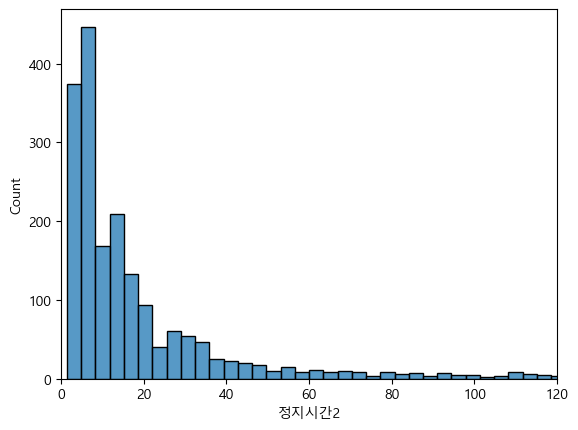

In [120]:
plt.xlim([0,120])
sns.histplot(data = df1_error, x='정지시간2')

In [121]:
stats.normaltest(df1_error['정지시간2'])
# P.value < 0.05
# 통계적 결론 : 대립가설 참
# 사실적 결론 : '정지시간2' 데이터의 분포가 정규분포를 띄지 않을 것이다.

NormaltestResult(statistic=3998.325606045262, pvalue=0.0)

<Axes: xlabel='메세지', ylabel='정지시간2'>

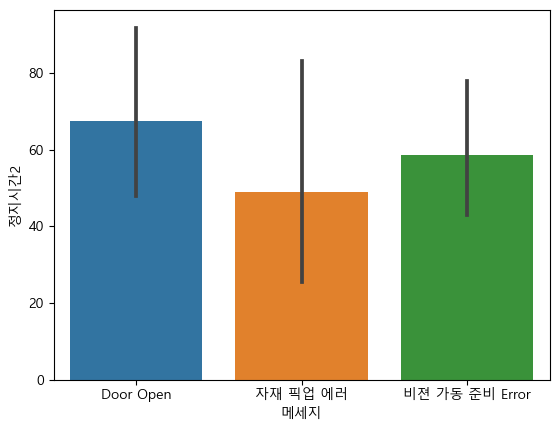

In [122]:
# 비정규분포에 대한 집단간 평균 비교 (비모수적 검정)
# 귀무가설 : 각 집단의 평균의 차이가 없다.
# 대립가설 : 각 집단의 평균의 차이가 있다.
sns.barplot(data = df1_error, x='메세지',y='정지시간2')

In [123]:
cond1 = (df1_error['메세지'] == 'Door Open')
cond2 = (df1_error['메세지'] == '자재 픽업 에러')
cond3 = (df1_error['메세지'] == '비젼 가동 준비 Error')

df1_door = df1_error.loc[cond1]
df1_pick = df1_error.loc[cond2]
df1_vision = df1_error.loc[cond3]

In [124]:
stats.kruskal(df1_door['정지시간2'], df1_pick['정지시간2'], df1_vision['정지시간2'])

KruskalResult(statistic=11.874092141392854, pvalue=0.002639815974990724)

In [125]:
# P.vluae < 0.05
# 통계적 결론 : 대립가설 참
# 사실적 결론 : 발생하는 핵심 에러 별 조치시간의 차이가 명확히 존재한다.

In [126]:
cond1 = (df1['메세지'] == 'Door Open')
df1_dooropen = df1.loc[cond1]

In [127]:
df1_dooropen.pivot_table(index = '작업구분', values = '정지시간2', aggfunc = 'mean')

,정지시간2
작업구분,
야간,55.083103
주간,78.958169


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='정지시간2', ylabel='Count'>

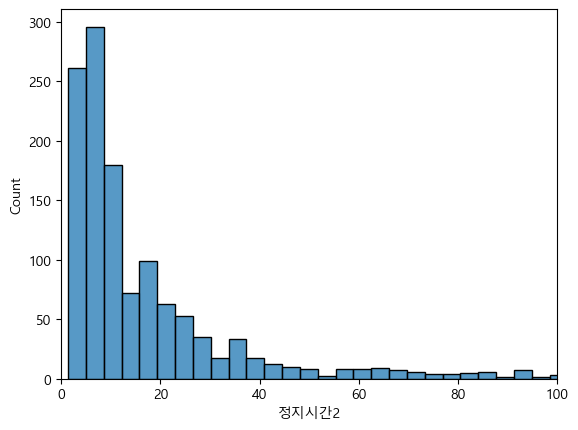

In [128]:
# 2-1. Door Open Error의 정지시간의 분포가 정규분포인지 아닌지
# 귀무가설 : Door Open Error의 정지시간의 분포가 정규분포이다.
# 대립가설 : Door Open Error의 정지시간의 분포가 정규분포가 아니다.
plt.xlim([0,100])
sns.histplot(data = df1_dooropen, x='정지시간2')

In [84]:
stats.normaltest(df1_dooropen['정지시간2'])

NormaltestResult(statistic=2647.03980170818, pvalue=0.0)

In [86]:
# P.value < 0.05 / 대립가설 참 / Door Open Error의 정지시간의 분포가 정규분포가 아니다.

In [88]:
# 2-2. 비정규분포 -> Ranksums
# 귀무가설 : 주간 작업과 야간작업의 정지시간의 평균의 차이가 없다.
# 대립가설 : 주간 작업과 야간작업의 정지시간의 평균의 차이가 있다.
cond1 = (df1_dooropen['작업구분'] == '주간')
cond2 = (df1_dooropen['작업구분'] == '야간')

df1_door_days = df1_dooropen.loc[cond1]
df1_door_night = df1_dooropen.loc[cond2]

In [90]:
stats.ranksums(df1_door_days['정지시간2'] , df1_door_night['정지시간2'])

RanksumsResult(statistic=1.663870780217619, pvalue=0.09613825542066314)

In [92]:
# P.value > 0.05
# 통계적 결론 : 귀무가설 참
# 사실적 결론 : 주간 작업과 야간작업의 정지시간의 평균의 차이가 없다.
